<a href="https://colab.research.google.com/github/vidhishah9/News-Articles-Classification/blob/main/ece219Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#1
import pandas as pd


In [9]:
#2
df = pd.read_csv('Project1-ClassificationDataset.csv')
print(df.columns.tolist())


['full_text', 'summary', 'keywords', 'publish_date', 'authors', 'url', 'leaf_label', 'root_label']


In [10]:
#3
count_row = df.shape[0]
count_col = df.shape[1]
print(count_row)
print(count_col)

3476
8


In [11]:
#4
import numpy as np
import random
np.random.seed(42)
random.seed(42)


In [12]:
#5
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

In [13]:
#6
import re
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

In [14]:
#7
train = train.map(clean)
test = test.map(clean)

print(train['full_text'])



2677    'While the four-day Aftershock's economic impa...
1204    'CBS Essentials is created independently of th...
2955    'Moderate-to-severe drought will likely contin...
2266    'Colleen Flood, the longtime co-owner of The F...
611     'WASHINGTON TRAFFIC MAY HAVE SAVED HIS LIFE. Y...
                              ...                        
1095    '(Photo by Justin Casterline/Getty Images) OAN...
1130    'COOKEVILLE, Tenn. (WKRN)  The Golden Eagles w...
1294    'FanDuel Sportsbook has launched an exclusive ...
860     'Hunting stories are a Maine tradition, just l...
3174    'By Lewis Jackson SYDNEY (Reuters) -Thousands ...
Name: full_text, Length: 2780, dtype: object


In [15]:
#8
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#CountVectorizer - Converts text into a Bag-of-Words representation (word frequency counts).

#TfidTransformer - Converts word counts into TF-IDF scores (weights words based on importance)
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
import re

wnl = nltk.wordnet.WordNetLemmatizer()  #Lemmmatizing - reduces words into it's base form

analyzer = CountVectorizer().build_analyzer() #CountVectorizer - splits text into words, .build_analyzer is used to create an analyzer to do stuff with the text like lower case, remove punctuation, etc

#Below functions are all text processing functoins used before vectorization

#POS tagging in nltk.pos_tag() follows the Penn Treebank format.
#WordNetLemmatizer needs a different format (it expects n, v, a, r).
#This function maps Penn POS tags → WordNet tags.

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'


#Below functions
#Receives a list of words.
#Finds their part-of-speech (POS) tags.
#Lemmatizes them using the correct POS tags.

def lemmatize_sent(list_word):
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
            for word, tag in pos_tag(list_word)]

#Uses analyzer(doc) to split the text into words.
#Lemmatizes each word.
#Removes numbers (if not word.isdigit()).

def rmv_nums(doc):
    return (word for word in lemmatize_sent(analyzer(doc))
            if not word.isdigit())



In [16]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
##9
#CountVectorizer
vectorizer = CountVectorizer(analyzer = rmv_nums, min_df = 3, stop_words = 'english')

import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')



#Fits CountVectorizer on the training data:
#Extracts unique words (vocabulary) from train['full_text'].
#Converts text into a word count matrix.

#Step 1 and 2
# The fit() method starts processing each document in train['full_text'].
# For each document, CountVectorizer calls: rmv_nums(document)
# This function processes the raw text, e.g., removing numbers.
# It returns a list of words (tokens) for that document.


# Step 3: Building the Vocabulary
# After all documents are processed by rmv_nums, CountVectorizer:
  # Counts all words in the dataset.
  # Removes stopwords (if stop_words='english').
  # Removes words appearing in fewer than 3 documents (min_df=3).
  # Creates a dictionary (vocabulary) mapping words to unique indices.

# Step 4: vectorizer.transform() Converts Text into a Sparse Matrix
  # Now, transform() processes the original documents again:
    # Uses the learned vocabulary to create a word count matrix.
    # Each document becomes a row, where:
    # Columns correspond to words in the vocabulary.
    # Each cell contains the count of a word in that document.
    # This results in a sparse matrix (since most words don’t appear in every document).

X_train_counts = vectorizer.fit_transform(train['full_text'])
print(X_train_counts)
X_test_counts = vectorizer.transform(test['full_text'])

# TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform training data using TfidfTransformer
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Transform testing data using fitted TfidfTransformer
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Print Results
print("Shape of TF-IDF-processed train matrix:", X_train_tfidf.shape)
print("Shape of TF-IDF-processed test matrix:", X_test_tfidf.shape)


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


  (0, 13270)	2
  (0, 12103)	16
  (0, 4788)	2
  (0, 3076)	8
  (0, 365)	4
  (0, 3809)	3
  (0, 5952)	3
  (0, 1157)	13
  (0, 7753)	4
  (0, 12538)	5
  (0, 5155)	5
  (0, 4520)	5
  (0, 10827)	2
  (0, 12252)	12
  (0, 11933)	3
  (0, 5987)	7
  (0, 571)	2
  (0, 4153)	2
  (0, 4231)	1
  (0, 12985)	2
  (0, 12246)	1
  (0, 13322)	3
  (0, 5143)	2
  (0, 5609)	1
  (0, 4725)	2
  :	:
  (2779, 11862)	1
  (2779, 3825)	1
  (2779, 9941)	2
  (2779, 9313)	1
  (2779, 1108)	2
  (2779, 8108)	1
  (2779, 6828)	1
  (2779, 2336)	1
  (2779, 5141)	1
  (2779, 4077)	1
  (2779, 12320)	2
  (2779, 6693)	1
  (2779, 3054)	1
  (2779, 10435)	1
  (2779, 8129)	1
  (2779, 13474)	2
  (2779, 1787)	2
  (2779, 6756)	1
  (2779, 7215)	1
  (2779, 6871)	1
  (2779, 7426)	1
  (2779, 717)	1
  (2779, 4101)	1
  (2779, 1925)	1
  (2779, 10637)	1
Shape of TF-IDF-processed train matrix: (2780, 13594)
Shape of TF-IDF-processed test matrix: (696, 13594)


In [18]:
#10
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

num_topics = 25  # Adjust based on dataset complexity
lsi_model = TruncatedSVD(n_components=num_topics, random_state=42)

U = lsi_model.fit_transform(X_train_dense)  # Document-Topic matrix (documents × topics)
Sigma = lsi_model.explained_variance_  # Singular values (importance of topics)
Sigma_diag = np.diag(Sigma)
V = lsi_model.components_  # Topic-Word matrix (topics × words)

X_reconstructed_lsi = U.dot(Sigma_diag).dot(V)
mse_lsi = mean_squared_error(X_train_dense, X_reconstructed_lsi)


num_topics = 25  # Adjust based on dataset complexity
nmf_model = NMF(n_components=num_topics, random_state=42)

W = nmf_model.fit_transform(X_train_dense)  # Document-Topic matrix (documents × topics)
H = nmf_model.components_        # Topic-Word matrix (topics × words)
X_reconstructed_nmf = W.dot(H)
mse_nmf = mean_squared_error(X_train_dense, X_reconstructed_nmf)

print("NMF Mean Square Error: ", mse_nmf)
print("LSI Mean Square Error: ", mse_lsi)

# feature_names = tfidf_transformer.get_feature_names_out()



NMF Mean Square Error:  4.9935293593618915e-05
LSI Mean Square Error:  7.300167260564394e-05


2677    climate
1204     sports
2955    climate
2266    climate
611      sports
         ...   
1095     sports
1130     sports
1294     sports
860      sports
3174    climate
Name: root_label, Length: 2780, dtype: object
[0 1 0 ... 1 1 0]


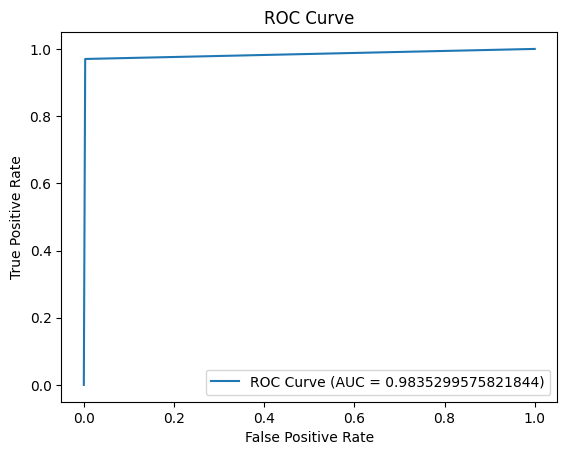

<Figure size 640x480 with 0 Axes>

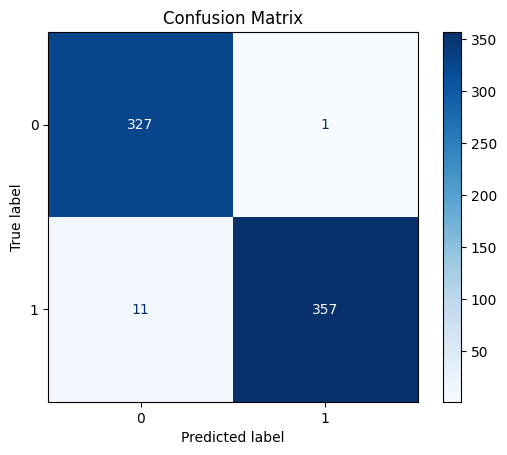

Confusion Matrix:
[[327   1]
 [ 11 357]]
Accuracy: 0.9827586206896551
Precision: 0.9972067039106145
Recall: 0.970108695652174
F1 Score: 0.9834710743801653
Your C Value: 1000


In [19]:

#11

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay


import seaborn as sns

# LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to y train and test data
y_train_encoded = label_encoder.fit_transform(train["root_label"])
print(train["root_label"])
print(y_train_encoded)
y_test_encoded = label_encoder.transform(test["root_label"])


C = 1000

# SVM classifier
svm = SVC(kernel = 'linear', probability = True, C = C)
svm.fit(X_train_tfidf, y_train_encoded)

# Predict labels
y_pred = svm.predict(X_test_tfidf)

# Calculate performance metrics
accuracy = metrics.accuracy_score(y_test_encoded, y_pred)
precision = metrics.precision_score(y_test_encoded, y_pred)
recall = metrics.recall_score(y_test_encoded, y_pred)
f1_score = metrics.f1_score(y_test_encoded, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test_encoded, y_pred)
auc = metrics.roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure()
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Print performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Your C Value:', C)


In [20]:
#12

from sklearn.linear_model import LogisticRegressionCV

# Range of regularization strengths
regularization_strengths = [10**k for k in range(-5, 6)]

# Grid search for L1
logistic_l1 = LogisticRegressionCV(Cs = regularization_strengths, cv = 5, penalty = 'l1', solver = 'liblinear')
logistic_l1.fit(X_train_tfidf, y_train_encoded)

# Best regularization strength for L1
best_c_l1 = logistic_l1.C_[0]

# Grid search for L2
logistic_l2 = LogisticRegressionCV(Cs = regularization_strengths, cv = 5, penalty = 'l2')
logistic_l2.fit(X_train_tfidf, y_train_encoded)

# Best regularization strength for L2
best_c_l2 = logistic_l2.C_[0]

# Print Results
print("Best regularization strength for L1 regularization:", best_c_l1)
print("Best regularization strength for L2 regularization:", best_c_l2)


Best regularization strength for L1 regularization: 100.0
Best regularization strength for L2 regularization: 100.0


Performance Metrics - Logistic Classifier without Regularization:
Accuracy: 0.9813218390804598
Precision: 0.9971988795518207
Recall: 0.967391304347826
F1 Score: 0.9820689655172414
Confusion Matrix - No Regularization:
[[327   1]
 [ 12 356]]


<Figure size 640x480 with 0 Axes>

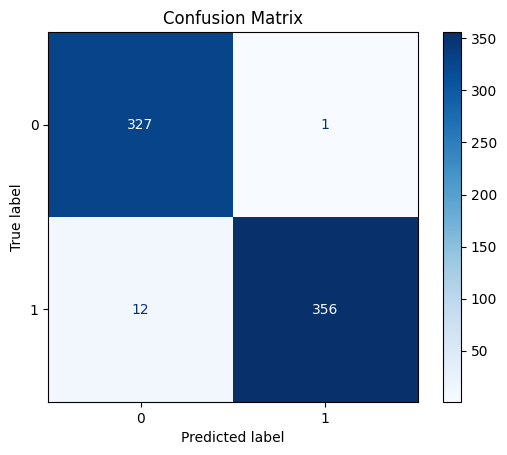

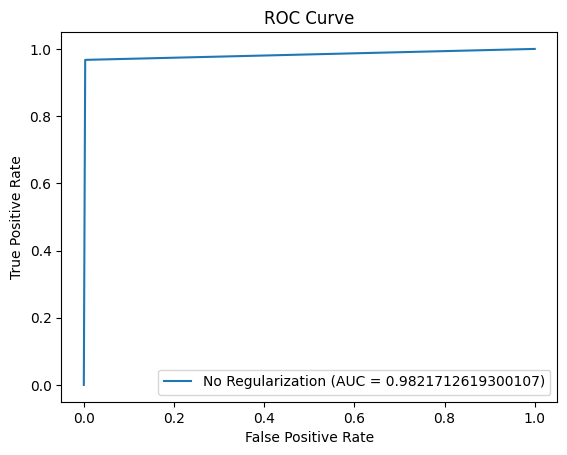

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Log classifier without regularization
logistic_no_reg = LogisticRegression(penalty = None, solver = 'saga', max_iter = 10000)
logistic_no_reg.fit(X_train_tfidf, y_train_encoded)

# Predict labels
y_pred_no_reg = logistic_no_reg.predict(X_test_tfidf)

# Calculate Performance Metrics
accuracy_no_reg = metrics.accuracy_score(y_test_encoded, y_pred_no_reg)
precision_no_reg = metrics.precision_score(y_test_encoded, y_pred_no_reg, zero_division = 1)
recall_no_reg = metrics.recall_score(y_test_encoded, y_pred_no_reg)
f1_score_no_reg = metrics.f1_score(y_test_encoded, y_pred_no_reg)

# Print performance metrics
print("Performance Metrics - Logistic Classifier without Regularization:")
print(f"Accuracy: {accuracy_no_reg}")
print(f"Precision: {precision_no_reg}")
print(f"Recall: {recall_no_reg}")
print(f"F1 Score: {f1_score_no_reg}")

# Calculate confusion matrix
conf_matrix_no_reg = metrics.confusion_matrix(y_test_encoded, y_pred_no_reg)

# Print confusion matrix
print('Confusion Matrix - No Regularization:')
print(conf_matrix_no_reg)

plt.figure()
disp = ConfusionMatrixDisplay(conf_matrix_no_reg)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()




# Plot ROC curve
fpr_no_reg, tpr_no_reg, _ = roc_curve(y_test_encoded, y_pred_no_reg)
roc_auc_no_reg = auc(fpr_no_reg, tpr_no_reg)
plt.plot(fpr_no_reg, tpr_no_reg, label = f'No Regularization (AUC = {roc_auc_no_reg})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Performance Metrics - Logistic Classifier with L1 Regularization:
Accuracy: 0.978448275862069
Precision: 0.9862258953168044
Recall: 0.9728260869565217
F1 Score: 0.9794801641586868
Confusion Matrix - L1:
[[323   5]
 [ 10 358]]


<Figure size 640x480 with 0 Axes>

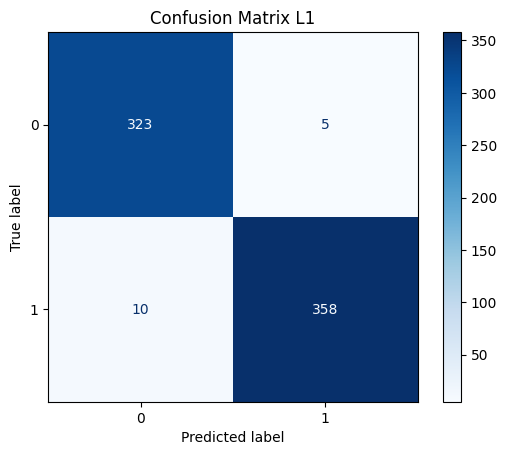

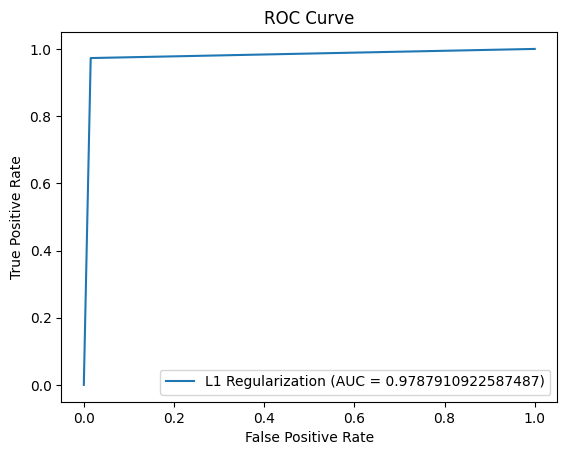

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Log classifier with L1
logistic_l1 = LogisticRegression(penalty = 'l1', C=best_c_l1, solver = 'saga', max_iter = 10000)
logistic_l1.fit(X_train_tfidf, y_train_encoded)

# Predict labels
y_pred_l1 = logistic_l1.predict(X_test_tfidf)

# Calculate Performance Metrics
accuracy_l1 = metrics.accuracy_score(y_test_encoded, y_pred_l1)
precision_l1 = metrics.precision_score(y_test_encoded, y_pred_l1, zero_division=1)
recall_l1 = metrics.recall_score(y_test_encoded, y_pred_l1)
f1_score_l1 = metrics.f1_score(y_test_encoded, y_pred_l1)

# Print performance metrics
print("Performance Metrics - Logistic Classifier with L1 Regularization:")
print(f"Accuracy: {accuracy_l1}")
print(f"Precision: {precision_l1}")
print(f"Recall: {recall_l1}")
print(f"F1 Score: {f1_score_l1}")

# Confusion matrix
conf_matrix_l1 = metrics.confusion_matrix(y_test_encoded, y_pred_l1)

# Print confusion matrix
print('Confusion Matrix - L1:')
print(conf_matrix_l1)

plt.figure()
disp = ConfusionMatrixDisplay(conf_matrix_l1)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix L1')
plt.show()

# Plot ROC curve
fpr_l1, tpr_l1, _ = roc_curve(y_test_encoded, y_pred_l1)
roc_auc_l1 = auc(fpr_l1, tpr_l1)
plt.plot(fpr_l1, tpr_l1, label = f'L1 Regularization (AUC = {roc_auc_l1})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Performance Metrics - Logistic Classifier with L2 Regularization:
Accuracy: 0.9813218390804598
Precision: 0.9944289693593314
Recall: 0.970108695652174
F1 Score: 0.9821182943603851
Confusion Matrix - L2:
[[326   2]
 [ 11 357]]


<Figure size 640x480 with 0 Axes>

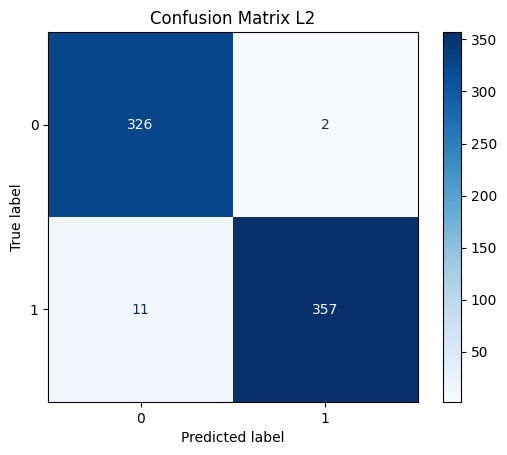

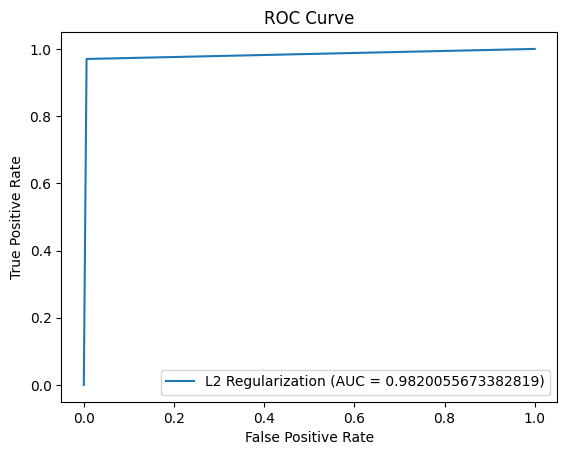

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Log classifier with L2
logistic_l2 = LogisticRegression(penalty = 'l2', C = best_c_l2, solver = 'saga', max_iter = 10000)
logistic_l2.fit(X_train_tfidf, y_train_encoded)

# Predict labels
y_pred_l2 = logistic_l2.predict(X_test_tfidf)

# Calculate Performance Metrics
accuracy_l2 = metrics.accuracy_score(y_test_encoded, y_pred_l2)
precision_l2 = metrics.precision_score(y_test_encoded, y_pred_l2, zero_division = 1)
recall_l2 = metrics.recall_score(y_test_encoded, y_pred_l2)
f1_score_l2 = metrics.f1_score(y_test_encoded, y_pred_l2)

# Print performance metrics
print("Performance Metrics - Logistic Classifier with L2 Regularization:")
print(f"Accuracy: {accuracy_l2}")
print(f"Precision: {precision_l2}")
print(f"Recall: {recall_l2}")
print(f"F1 Score: {f1_score_l2}")

# Confusion matrix for logistic_l2
conf_matrix_l2 = metrics.confusion_matrix(y_test_encoded, y_pred_l2)

# Print confusion matrix
print('Confusion Matrix - L2:')
print(conf_matrix_l2)

plt.figure()
disp = ConfusionMatrixDisplay(conf_matrix_l2)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix L2')
plt.show()

# Plot ROC curve for logistic_l2
fpr_l2, tpr_l2, _ = roc_curve(y_test_encoded, y_pred_l2)
roc_auc_l2 = auc(fpr_l2, tpr_l2)
plt.plot(fpr_l2, tpr_l2, label = f'L2 Regularization (AUC = {roc_auc_l2})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
